# Task

! Note: this workshop is based on a Kaggle challenge and dataset: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

### Set up for participants
Imagine you're working for an HR-Tech agency as a Data Specialist, and your job is to conduct research that helps companies work with their employees and candidates in more efficient ways. 

Today your task is to analyze the data of an IT company and propose some suggestions for them. The company runs the upskilling courses, and the best graduates get a chance to get hired. 
Your client wants to know which of these candidates actually want to work for the company after the training and which will be looking for another opportunity.

In the dataset, you'll find the credentials, demographics and experience of the candidates. You'll need to identify the factors, based on which you'll decide whether the candidate wants to work for the company.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
employees_dataset = pd.read_csv('aug_train.csv')
employees_dataset['target'] = employees_dataset['target'].astype(int)

## Part 1. Get closer to the data in general
Look at the data. What would be our first step?

1. Which columns do we have? 
2. What each of them contains?
3. What types of data do we have?
4. Do we have enough data? 
5. How many null values do we have?

In [3]:
employees_dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


Features

- **enrollee_id** : Unique ID for candidate
- **city**: City code
- **city_development_index** : Developement index of the city (scaled)
- **gender**: Gender of candidate
- **relevent_experience**: Relevant experience of candidate
- **enrolled_university**: Type of University course enrolled if any
- **education_level**: Education level of candidate
- **major_discipline** :Education major discipline of candidate
- **experience**: Candidate total experience in years
- **company_size**: No of employees in current employer's company
- **company_type** : Type of current employer
- **lastnewjob**: Difference in years between previous job and current job
- **training_hours**: training hours completed
- **target**: 0 – Not looking for job change, 1 – Looking for a job change

In [4]:
employees_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

There are null values in the dataset, but I think we can skip this part.

## Part 2. Look at the column values

At which columns should we look first?

Firstly let's see how many enrollees say they want to leave their current job. We can do it shortly with .value_counts() or more clearly with barplot.

In [5]:
employees_dataset.target.value_counts()

0    14381
1     4777
Name: target, dtype: int64

In [6]:
employees_dataset.target.value_counts(normalize=True)

0    0.750652
1    0.249348
Name: target, dtype: float64

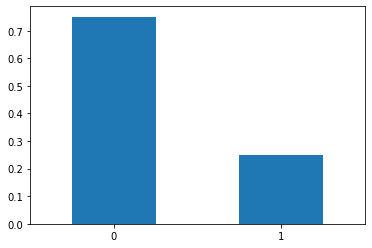

In [7]:
%matplotlib inline

employees_dataset.target.value_counts(normalize=True).plot(kind='bar', rot=0)

Don't forget to format your chart in a proper way, it's very important.

### **Perfect chart checklist:**
- [ ] **Title**
- [ ] **Color legend**
- [ ] **Axis labels with units (if exist)**
- [ ] **Axis values**

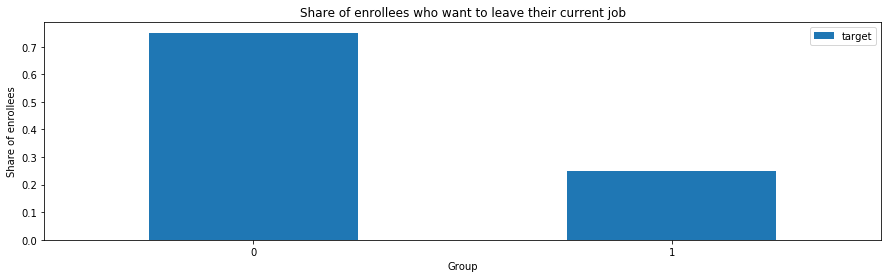

In [8]:
import matplotlib.pyplot as plt

employees_dataset.target.value_counts(normalize=True).plot(kind='bar', figsize=(15, 4), rot=0)
plt.title('Share of enrollees who want to leave their current job')
plt.legend()
plt.ylabel('Share of enrollees')
plt.xlabel('Group')
plt.show()

We can rename xticks for groups for better understanding.

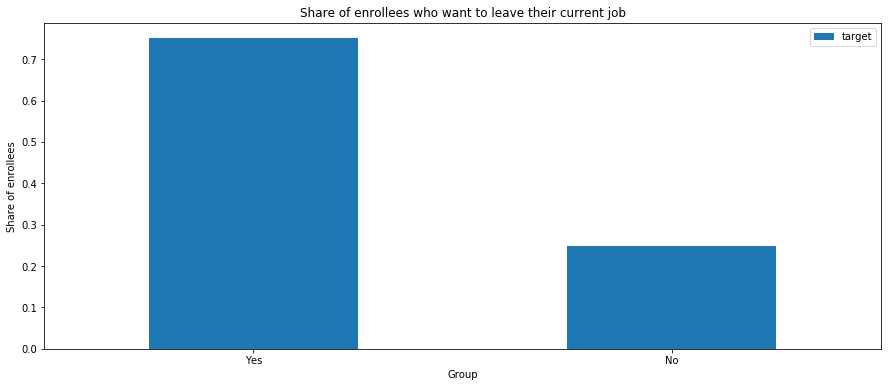

In [10]:
employees_dataset.target.value_counts(normalize=True).plot(kind='bar', figsize=(7, 4), rot=0)
plt.title('Share of enrollees who want to leave their current job')
plt.legend()
plt.ylabel('Share of enrollees')
plt.xlabel('Group')
plt.xticks(ticks=[0, 1], labels=['want to stay', 'want to leave'])
plt.show()

## Part 3. Look at other column values
Let's use more chart tools. For example, change the font color. Docs are available here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

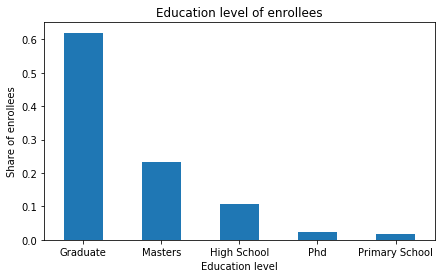

In [10]:
employees_dataset.education_level.value_counts(normalize=True).plot(kind='bar', figsize=(7, 4), rot=0)
plt.title('Education level of enrollees')
plt.ylabel('Share of enrollees')
plt.xlabel('Education level')
plt.show()

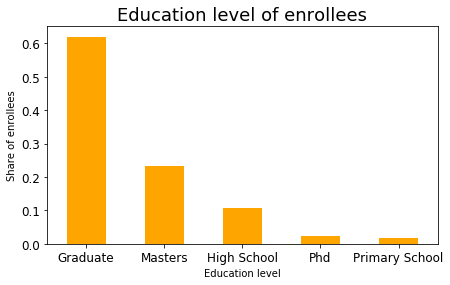

In [12]:
employees_dataset.education_level.value_counts(normalize=True).plot(
    kind='bar', figsize=(7, 4), rot=0, color='orange', fontsize=12
)
plt.title('Education level of enrollees', fontsize=18)
plt.ylabel('Share of enrollees', fontsize=10)
plt.xlabel('Education level', fontsize=10)
plt.show()

We can also add values for each bar for better clarity.

In [13]:
bar_data = employees_dataset.education_level.value_counts(normalize=True)
bar_data

Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: education_level, dtype: float64

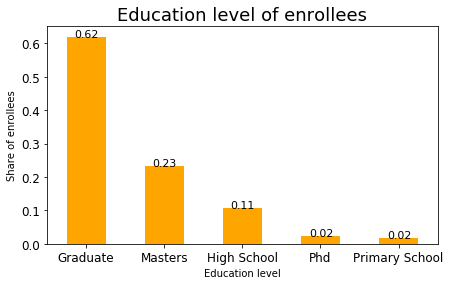

In [12]:
bar_data = employees_dataset.education_level.value_counts(normalize=True)

bar_data.plot(
    kind='bar', figsize=(7, 4), rot=0, color='orange', fontsize=12
)
plt.title('Education level of enrollees', fontsize=18)
plt.ylabel('Share of enrollees', fontsize=10)
plt.xlabel('Education level', fontsize=10)

for i, (x, y) in enumerate(bar_data.to_dict().items()):
    plt.text(i-.15, y, s=str(round(y, 2)), fontsize=11)

plt.show()

There are too many columns to copy and paste the data. Let's automate it!

In [14]:
def show_bar_chart(dataframe: pd.core.frame.DataFrame, column_name: str):
    bar_data = dataframe[column_name].value_counts(normalize=True)

    bar_data.plot(
        kind='bar', figsize=(10, 3), rot=0, color='orange', fontsize=12
    )
    
    beautify_column_name = column_name[0].upper() + column_name[1:].replace('_', ' ')
    # relevent_experience -> Relevent experience
    
    plt.title(f'{beautify_column_name} of enrollees', fontsize=18)
    plt.ylabel('Share of enrollees', fontsize=10)
    plt.xlabel(beautify_column_name, fontsize=10)

    for i, (x, y) in enumerate(bar_data.to_dict().items()):
        plt.text(i-.15, y, s=str(round(y, 2)), fontsize=11)

    plt.show()

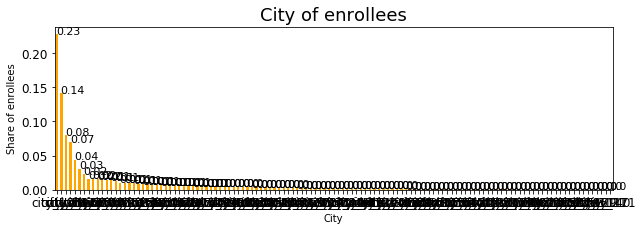

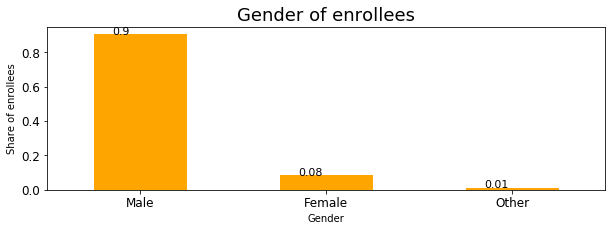

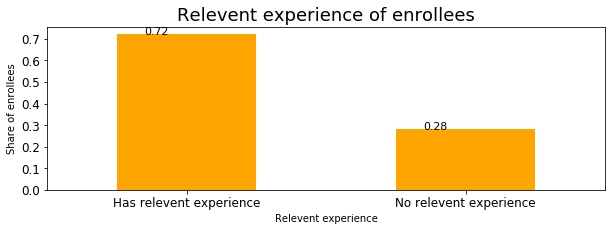

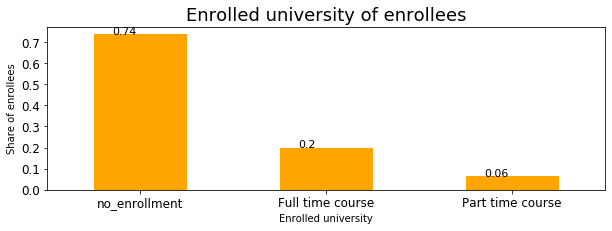

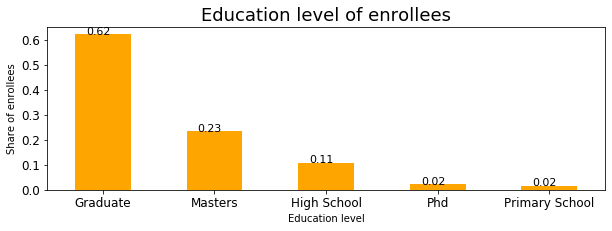

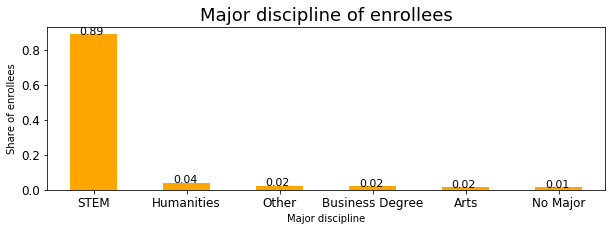

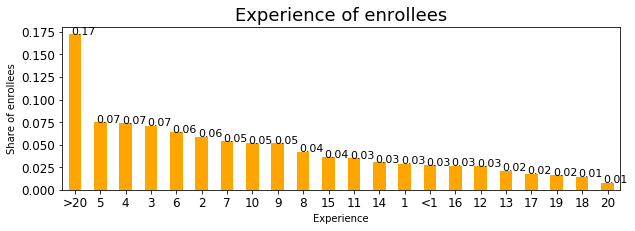

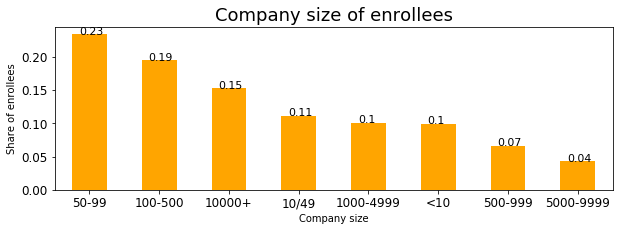

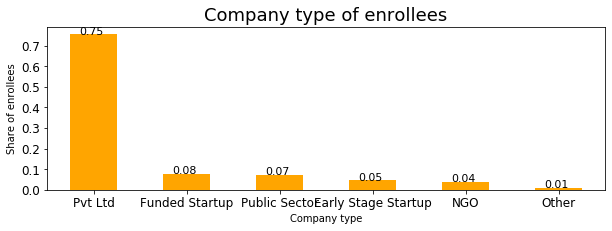

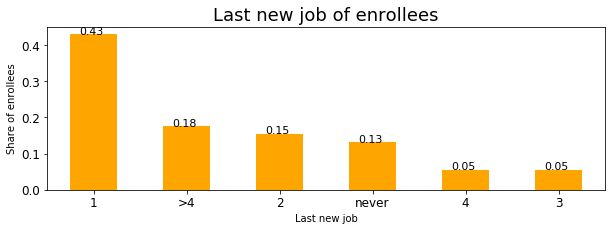

In [15]:
%matplotlib inline

for column in employees_dataset.columns:
    if employees_dataset[column].dtype == 'O':
        show_bar_chart(employees_dataset, column)

## Part 4. Other charts and going deeper
Numerical features can be shown as histograms.  
Look at the City development index histogram. We can simplify this data by dividing it into groups for easier analysis.

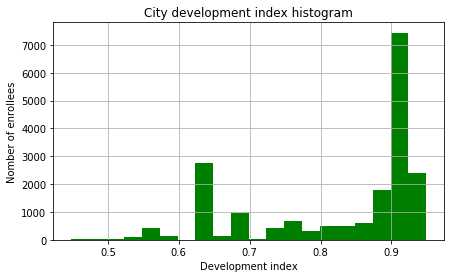

In [15]:
employees_dataset.city_development_index.hist(bins=20, figsize=(7, 4), color='green')
plt.title('City development index histogram')
plt.ylabel('Nomber of enrollees')
plt.xlabel('Development index')
plt.show()

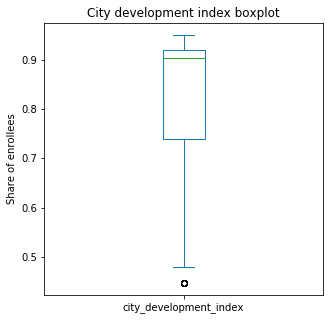

In [16]:
employees_dataset.city_development_index.plot(kind='box', figsize=(5, 5))
plt.title('City development index boxplot')
plt.ylabel('Share of enrollees')
plt.show()

In [17]:
employees_dataset.city_development_index.mean(), employees_dataset.city_development_index.median()

(0.8288480008351684, 0.903)

In [19]:
avg_city_dev_index = employees_dataset.city_development_index.mean()
employees_dataset['city_development_class'] = (
    employees_dataset.city_development_index > avg_city_dev_index
).astype(int)

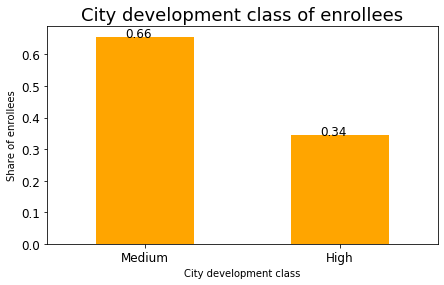

In [20]:
bar_data = employees_dataset.city_development_class.value_counts(normalize=True)

bar_data.plot(
    kind='bar', figsize=(7, 4), rot=0, color='orange', fontsize=12
)
plt.title('City development class of enrollees', fontsize=18)
plt.ylabel('Share of enrollees', fontsize=10)
plt.xlabel('City development class', fontsize=10)

for i, (x, y) in enumerate(bar_data.to_dict().items()):
    plt.text(i-.1, y, s=str(round(y, 2)), fontsize=12)

plt.xticks([0,1], ['Medium', 'High'])
plt.show()

## Part 5. Compare features
Our goal is to understand how enrollees background affects the target. Let's look at slices or make a grouped chart.

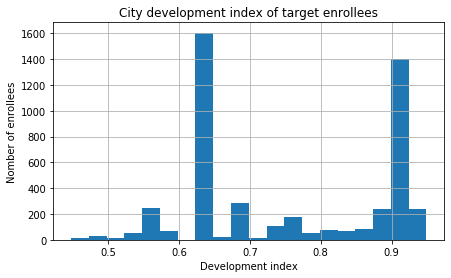

In [21]:
employees_dataset[employees_dataset.target == 1].city_development_index.hist(bins=20, figsize=(7, 4))
plt.title('City development index of target enrollees')
plt.ylabel('Nomber of enrollees')
plt.xlabel('Development index')
plt.show()

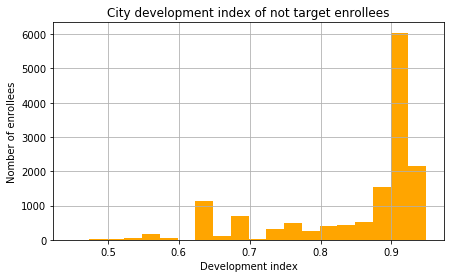

In [22]:
employees_dataset[employees_dataset.target == 0].city_development_index.hist(bins=20, figsize=(7, 4), color='orange')
plt.title('City development index of not target enrollees')
plt.ylabel('Nomber of enrollees')
plt.xlabel('Development index')
plt.show()

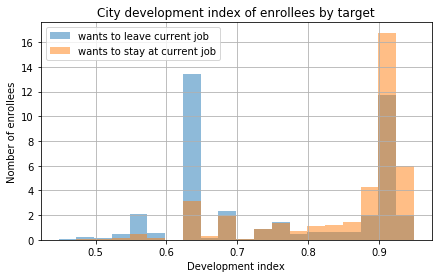

In [23]:
employees_dataset[employees_dataset.target == 1].city_development_index.hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
employees_dataset[employees_dataset.target == 0].city_development_index.hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
plt.title('City development index of enrollees by target')
plt.ylabel('Nomber of enrollees')
plt.xlabel('Development index')
plt.legend(['wants to leave current job', 'wants to stay at current job'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


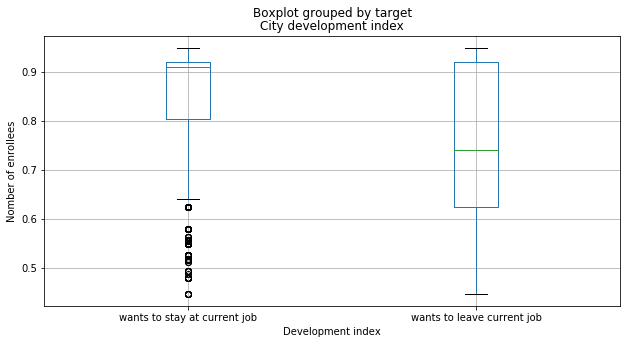

In [24]:
employees_dataset[['city_development_index', 'target']].boxplot(figsize=(10, 5), by='target')
plt.title('City development index')
plt.ylabel('Nomber of enrollees')
plt.xlabel('Development index')
plt.xticks([1, 2], ['wants to stay at current job', 'wants to leave current job'])
plt.show()

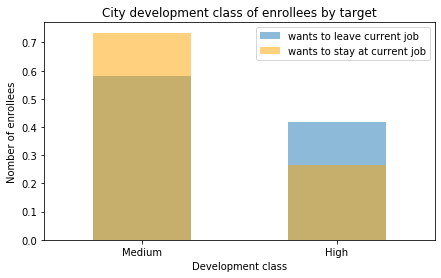

In [25]:
employees_dataset[employees_dataset.target == 1].city_development_class.value_counts(normalize=True).plot(
    kind='bar', figsize=(7, 4), alpha=.5, rot=0
)
employees_dataset[employees_dataset.target == 0].city_development_class.value_counts(normalize=True).plot(
    kind='bar', figsize=(7, 4), alpha=.5, rot=0, color='orange'
)
plt.title('City development class of enrollees by target')
plt.ylabel('Nomber of enrollees')
plt.xlabel('Development class')
plt.xticks([0,1], ['Medium', 'High'])
plt.legend(['wants to leave current job', 'wants to stay at current job'])
plt.show()

When we look at these charts it's apparent that enrollees from cities with lower development index are more likely to leave their current job.  
What chart shows this fact the best way? Or in other words, what chart will you put to the report to prove your statement to the client?

## Part 7. Making a final report
Our task was to analyze the data of an IT company and propose some suggestions for their hiring process.

Now it's time to compile all suggestions from the students, attach a few charts to prove them and "send" the final report to our client.

Congrats!